In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
path = 'data/preprocessed'
os.listdir(path)

['2020-03-14.csv',
 '2020-03-28.csv',
 '2020-03-25.csv',
 '2020-03-18.csv',
 '2020-03-17.csv',
 '2020-03-30.csv',
 '2020-03-20.csv',
 '2020-03-23.csv',
 '2020-03-15.csv',
 '2020-03-24.csv',
 '2020-03-16.csv',
 '2020-03-26.csv',
 '2020-03-22.csv',
 '2020-03-13.csv',
 '2020-03-27.csv',
 '.ipynb_checkpoints',
 '2020-03-19.csv',
 '2020-03-21.csv',
 '2020-03-00.csv',
 '2020-03-29.csv',
 '2020-03-12.csv']

In [3]:
ht = pd.read_csv('data/raw/Hashtags.CSV')
ht.sample(5)

,status_id,hashtag
25536712,1238602986030497803,CoronaOutbreak
3060880,1241438394770690049,coronavirus
15211543,1240589074760531968,COVID19
12997534,1240570466537852928,properleadership
395214,1241865699947171841,COVID19


In [4]:
print('Most common hastags')
ht.hashtag.value_counts().sort_index(ascending=False).head()

Most common hastags


𝙲𝚘𝚟𝚒𝚍𝟷𝟿         4
𝙲𝙾𝚅𝙸𝙳𝟷𝟿         1
𝙘𝙤𝙫𝙞𝙙19         1
𝙘𝙤𝙧𝙤𝙣𝙖𝙫𝙞𝙧𝙪𝙨     1
𝘾𝙤𝙧𝙤𝙣𝙖𝙫𝙞𝙧𝙪𝙨    10
Name: hashtag, dtype: int64

In [17]:
ht.hashtag.nunique()

1227161

In [5]:
countries = pd.read_csv('data/raw/Countries.CSV')
countries.sample(5)

,country,country_code
167,Saint Barthélemy,BL
126,Martinique,MQ
110,Latvia,LV
60,Ethiopia,ET
0,NaN,NaN


In [24]:
usecols = ['status_id', 'user_id', 'created_at', 'screen_name', 
       'reply_to_status_id', 'reply_to_user_id', 'reply_to_screen_name',
       'is_quote', 'is_retweet', 'favourites_count', 'retweet_count',
       'country_code', 'followers_count',
       'friends_count', 'account_lang', 'account_created_at', 'verified',
       'lang', 'hashtag', 'mention']
dtypes = {'status_id': int, 'user_id': int, 'screen_name': str, 'reply_to_status_id': 'Int64', 'reply_to_user_id': 'Int64', 
          'reply_to_screen_name': str, 'is_quote': bool, 'is_retweet': bool, 'favourites_count': int, 'retweet_count': int, 'mention': str,
          'country_code': str, 'followers_count': int, 'friends_count': int, 'account_lang': str, 'verified': bool, 'lang': str, 'hashtag': str,}
df = []
# use only one dataframe for now, remove later!
for file in sorted([i for i in os.listdir('data/preprocessed') if i.endswith('.csv')]):
    d = pd.read_csv(os.path.join('data/preprocessed', file), usecols=usecols, parse_dates=['created_at', 'account_created_at'], dtype=dtypes)
    df.append(d)

In [25]:
df = pd.concat(df, axis=0)

In [26]:
print('The dataset contains {} tweets from {} authors and {} countries'.format(len(df), df.user_id.nunique(), df.country_code.nunique()))
print('There {} are retweets, {} quotes and {} are replies'.format(df.is_retweet.dropna().sum(), df.is_quote.dropna().sum(), len(df.reply_to_status_id.dropna())))

The dataset contains 11522141 tweets from 3160593 authors and 222 countries
There 0 are retweets, 1365907 quotes and 1392750 are replies


In [27]:
df['is_reply'] = ~df.reply_to_status_id.isna()

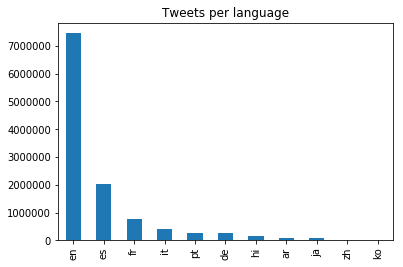

In [28]:
df.lang.value_counts().plot.bar()
_ = plt.title('Tweets per language')

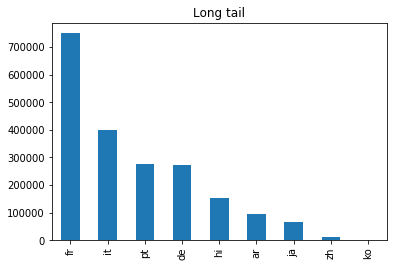

In [29]:
df[~df.lang.isin({'en', 'es'})].lang.value_counts().plot.bar()
_ = plt.title('Long tail')

In [30]:
# check out the users
users = df.groupby(['user_id', 'screen_name', 'account_created_at', 'verified'], as_index=False)
users= users[['status_id', 'is_reply', 'is_quote', 'followers_count', 'friends_count']].agg({'is_reply': 'sum', 'is_quote': 'sum',
                                                                                                      'followers_count': 'mean',
                                                                                                      'friends_count': 'mean', 'status_id': 'count'})

In [31]:
users = users[['user_id', 'screen_name', 'account_created_at', 'verified', 'status_id', 'is_reply', 'is_quote', 'followers_count', 'friends_count']]
users.followers_count = users.followers_count.astype(int)
users.friends_count = users.friends_count.astype(int)
users.columns = ['user_id', 'screen_name', 'account_created_at', 'verified', 'total_tweets', 'total_replies', 'total_quotes', 'mean_followers', 'mean_friends']

In [32]:
print('There are {} unique users'.format(len(users)))
print('The most followed users are')
users.sort_values(by='mean_followers', ascending=False).head()

There are 3170850 unique users
The most followed users are


,user_id,screen_name,account_created_at,verified,total_tweets,total_replies,total_quotes,mean_followers,mean_friends
166253,25073877,realDonaldTrump,2009-03-18 13:46:38+00:00,True,1,0.0,0.0,74483122,47
168848,25365536,KimKardashian,2009-03-19 19:21:56+00:00,True,4,0.0,0.0,64408829,130
319809,50393960,BillGates,2009-06-24 18:44:10+00:00,True,3,0.0,0.0,49250694,217
1245,759251,CNN,2007-02-09 00:35:02+00:00,True,13,0.0,0.0,46154082,1107
147368,23083404,KingJames,2009-03-06 16:25:53+00:00,True,1,0.0,0.0,45576188,187


In [33]:
print('The most tweets')
users.sort_values(by='total_tweets', ascending=False).head()

The most tweets


,user_id,screen_name,account_created_at,verified,total_tweets,total_replies,total_quotes,mean_followers,mean_friends
2382754,938533034659168256,openletterbot,2017-12-06 22:18:07+00:00,True,38345,0.0,0.0,16685,3
2042018,4913320595,Only_rock_radio,2016-02-15 12:09:37+00:00,False,11457,0.0,0.0,29171,19059
607859,139283160,kr3at,2010-05-02 03:52:20+00:00,False,9662,163.0,209.0,17291,7134
918851,289118612,TomthunkitsMind,2011-04-28 01:56:15+00:00,False,8819,1.0,175.0,68214,63121
799579,231726084,zazoomblog,2010-12-29 08:42:05+00:00,False,7724,0.0,0.0,5391,1557


In [34]:
df.mention.head()

0                 @SCMPgraphics
1                          @CNN
2                           NaN
3                           NaN
4    @Yunfei_Zh,, @CGTNOfficial
Name: mention, dtype: object

In [35]:
df.hashtag.sample(5)

120702    #herdimmunity, #coronavirus, #coronavirusuk, #...
142029                                         #CORONAVIRUS
333874                                   #Angola, #Covid_19
430387                                    #Coronavirus, #60
409024                                         #coronavirus
Name: hashtag, dtype: object

In [36]:
len(df)

11522141

In [37]:
len(df.lang.dropna())

11522141